In [1]:
#pip install prophet

In [2]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [3]:

"""api_key = 'fwdNK9dZRNgFikLYyFaMEkUfd7aXwB5oIquZh405'
base_url = "https://api.eia.gov/v2/electricity/retail-sales/data/"
params = {
    "frequency": "monthly",
    "data": [
        "price"
    ],
    "facets": {
        "stateid": [
            "US"
        ]
    },
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,
    "length": 5000
}

all_data = []
while True:
    response = requests.get(base_url, params=params)
    data = response.json()
    all_data.extend(data['response']['data'])
    if len(data['response']['data']) < params['length']:
        break
    params['offset'] += params['length']
df_elect = pd.DataFrame(all_data)

csv_file_path = 'electro_us.csv'
df_elect.to_csv(csv_file_path, index=False)
print(f"Data saved to {csv_file_path}")"""

'api_key = \'fwdNK9dZRNgFikLYyFaMEkUfd7aXwB5oIquZh405\'\nbase_url = "https://api.eia.gov/v2/electricity/retail-sales/data/"\nparams = {\n    "frequency": "monthly",\n    "data": [\n        "price"\n    ],\n    "facets": {\n        "stateid": [\n            "US"\n        ]\n    },\n    "sort": [\n        {\n            "column": "period",\n            "direction": "desc"\n        }\n    ],\n    "offset": 0,\n    "length": 5000\n}\n\nall_data = []\nwhile True:\n    response = requests.get(base_url, params=params)\n    data = response.json()\n    all_data.extend(data[\'response\'][\'data\'])\n    if len(data[\'response\'][\'data\']) < params[\'length\']:\n        break\n    params[\'offset\'] += params[\'length\']\ndf_elect = pd.DataFrame(all_data)\n\ncsv_file_path = \'electro_us.csv\'\ndf_elect.to_csv(csv_file_path, index=False)\nprint(f"Data saved to {csv_file_path}")'

In [4]:
df3 = pd.read_csv("data_elect.csv")
df3

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2024-04,US,U.S. Total,ALL,all sectors,12.71,cents per kilowatthour
1,2024-04,US,U.S. Total,TRA,transportation,12.64,cents per kilowatthour
2,2024-04,US,U.S. Total,RES,residential,16.88,cents per kilowatthour
3,2024-04,US,U.S. Total,OTH,other,NaN,cents per kilowatthour
4,2024-04,US,U.S. Total,IND,industrial,7.82,cents per kilowatthour
...,...,...,...,...,...,...,...
1675,2001-01,US,U.S. Total,COM,commercial,7.25,cents per kilowatthour
1676,2001-01,US,U.S. Total,IND,industrial,4.73,cents per kilowatthour
1677,2001-01,US,U.S. Total,OTH,other,6.48,cents per kilowatthour
1678,2001-01,US,U.S. Total,RES,residential,7.73,cents per kilowatthour


In [5]:
df4 = pd.read_csv("petro_2.csv")
df4

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-07-01,NUS,U.S.,EPMM,Midgrade Gasoline,PTE,Retail Sales,EMM_EPMM_PTE_NUS_DPG,U.S. Midgrade All Formulations Retail Gasoline...,3.990,$/GAL
1,2024-07-01,NUS,U.S.,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_NUS_DPG,U.S. No 2 Diesel Retail Prices (Dollars per Ga...,3.813,$/GAL
2,2024-07-01,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,3.479,$/GAL
3,2024-07-01,NUS,U.S.,EPMP,Premium Gasoline,PTE,Retail Sales,EMM_EPMP_PTE_NUS_DPG,U.S. Premium All Formulations Retail Gasoline ...,4.344,$/GAL
4,2024-06-24,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,3.438,$/GAL
...,...,...,...,...,...,...,...,...,...,...,...
6434,1990-09-17,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,1.266,$/GAL
6435,1990-09-10,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,1.252,$/GAL
6436,1990-09-03,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,1.242,$/GAL
6437,1990-08-27,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,1.245,$/GAL


In [6]:
df1 = pd.read_csv("petro.csv")
df1


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-06-17,SWA,WASHINGTON,EPMM,Midgrade Gasoline,PTE,Retail Sales,EMM_EPMM_PTE_SWA_DPG,Washington Midgrade All Formulations Retail Ga...,4.538,$/GAL
1,2024-06-17,SOH,OHIO,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_SOH_DPG,Ohio Regular All Formulations Retail Gasoline ...,3.439,$/GAL
2,2024-06-17,SCA,CALIFORNIA,EPMM,Midgrade Gasoline,PTE,Retail Sales,EMM_EPMM_PTE_SCA_DPG,California Midgrade All Formulations Retail Ga...,4.925,$/GAL
3,2024-06-17,SNY,NEW YORK,EPMP,Premium Gasoline,PTE,Retail Sales,EMM_EPMP_PTE_SNY_DPG,New York Premium All Formulations Retail Gasol...,4.322,$/GAL
4,2024-06-17,SWA,WASHINGTON,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_SWA_DPG,Washington Regular All Formulations Retail Gas...,4.180,$/GAL
...,...,...,...,...,...,...,...,...,...,...,...
33538,1995-07-31,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,1.258,$/GAL
33539,1995-07-24,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,1.258,$/GAL
33540,1995-07-17,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,1.264,$/GAL
33541,1995-07-10,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,1.274,$/GAL


In [7]:
df2 = pd.read_csv("electro.csv")
df2

,period,stateid,stateDescription,sectorid,sectorName,customers,price,customers-units,price-units
0,2024-03,TX,Texas,ALL,all sectors,14220334.0,9.51,number of customers,cents per kilowatthour
1,2024-03,MA,Massachusetts,TRA,transportation,2.0,9.40,number of customers,cents per kilowatthour
2,2024-03,MA,Massachusetts,RES,residential,2941671.0,29.66,number of customers,cents per kilowatthour
3,2024-03,MA,Massachusetts,OTH,other,NaN,NaN,number of customers,cents per kilowatthour
4,2024-03,MA,Massachusetts,IND,industrial,10192.0,17.97,number of customers,cents per kilowatthour
...,...,...,...,...,...,...,...,...,...
15061,2001-01,MN,Minnesota,COM,commercial,NaN,4.98,number of customers,cents per kilowatthour
15062,2001-01,MN,Minnesota,IND,industrial,NaN,4.32,number of customers,cents per kilowatthour
15063,2001-01,MN,Minnesota,OTH,other,NaN,6.79,number of customers,cents per kilowatthour
15064,2001-01,MN,Minnesota,RES,residential,NaN,7.03,number of customers,cents per kilowatthour


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33543 entries, 0 to 33542
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              33543 non-null  object 
 1   duoarea             33543 non-null  object 
 2   area-name           33543 non-null  object 
 3   product             33543 non-null  object 
 4   product-name        33543 non-null  object 
 5   process             33543 non-null  object 
 6   process-name        33543 non-null  object 
 7   series              33543 non-null  object 
 8   series-description  33543 non-null  object 
 9   value               33543 non-null  float64
 10  units               33543 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [9]:
df1['period'] = pd.to_datetime(df1['period'])
df2['period'] = pd.to_datetime(df2['period'])
df3['period'] = pd.to_datetime(df3['period'])
df4["period"] = pd.to_datetime(df4["period"])

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15066 entries, 0 to 15065
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   period            15066 non-null  datetime64[ns]
 1   stateid           15066 non-null  object        
 2   stateDescription  15066 non-null  object        
 3   sectorid          15066 non-null  object        
 4   sectorName        15066 non-null  object        
 5   customers         8776 non-null   float64       
 6   price             12557 non-null  float64       
 7   customers-units   15066 non-null  object        
 8   price-units       15066 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.0+ MB


In [11]:
df1.isna().sum()

period                0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64

In [12]:
df2.isna().sum()

period                 0
stateid                0
stateDescription       0
sectorid               0
sectorName             0
customers           6290
price               2509
customers-units        0
price-units            0
dtype: int64

In [13]:
def delete_columns(df):
    # List of columns to be deleted from the DataFrame
    columns_to_delete = ['stateDescription', 'sectorid', 'customers', 'customers-units']
    # Drop the specified columns from the DataFrame
    # inplace=True modifies the original DataFrame
    # errors='ignore' ensures that no error is raised if a column is not found in the DataFrame
    df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
    # Return the modified DataFrame
    return df

In [14]:
df2 = delete_columns(df2)
df2

,period,stateid,sectorName,price,price-units
0,2024-03-01,TX,all sectors,9.51,cents per kilowatthour
1,2024-03-01,MA,transportation,9.40,cents per kilowatthour
2,2024-03-01,MA,residential,29.66,cents per kilowatthour
3,2024-03-01,MA,other,NaN,cents per kilowatthour
4,2024-03-01,MA,industrial,17.97,cents per kilowatthour
...,...,...,...,...,...
15061,2001-01-01,MN,commercial,4.98,cents per kilowatthour
15062,2001-01-01,MN,industrial,4.32,cents per kilowatthour
15063,2001-01-01,MN,other,6.79,cents per kilowatthour
15064,2001-01-01,MN,residential,7.03,cents per kilowatthour


In [15]:
df3 = delete_columns(df3)
df3

,period,stateid,sectorName,price,price-units
0,2024-04-01,US,all sectors,12.71,cents per kilowatthour
1,2024-04-01,US,transportation,12.64,cents per kilowatthour
2,2024-04-01,US,residential,16.88,cents per kilowatthour
3,2024-04-01,US,other,NaN,cents per kilowatthour
4,2024-04-01,US,industrial,7.82,cents per kilowatthour
...,...,...,...,...,...
1675,2001-01-01,US,commercial,7.25,cents per kilowatthour
1676,2001-01-01,US,industrial,4.73,cents per kilowatthour
1677,2001-01-01,US,other,6.48,cents per kilowatthour
1678,2001-01-01,US,residential,7.73,cents per kilowatthour


In [16]:
def convert_price_to_liter(df):
    # Conversion factor from gallons to liters
    gallons_to_liters = 3.785
    
    # Convert the 'value' column from $/GAL to $/L
    df['value'] = df['value'] / gallons_to_liters
    
    return df

In [17]:
df1 = convert_price_to_liter(df1)
df1

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-06-17,SWA,WASHINGTON,EPMM,Midgrade Gasoline,PTE,Retail Sales,EMM_EPMM_PTE_SWA_DPG,Washington Midgrade All Formulations Retail Ga...,1.198943,$/GAL
1,2024-06-17,SOH,OHIO,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_SOH_DPG,Ohio Regular All Formulations Retail Gasoline ...,0.908587,$/GAL
2,2024-06-17,SCA,CALIFORNIA,EPMM,Midgrade Gasoline,PTE,Retail Sales,EMM_EPMM_PTE_SCA_DPG,California Midgrade All Formulations Retail Ga...,1.301189,$/GAL
3,2024-06-17,SNY,NEW YORK,EPMP,Premium Gasoline,PTE,Retail Sales,EMM_EPMP_PTE_SNY_DPG,New York Premium All Formulations Retail Gasol...,1.141876,$/GAL
4,2024-06-17,SWA,WASHINGTON,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_SWA_DPG,Washington Regular All Formulations Retail Gas...,1.104359,$/GAL
...,...,...,...,...,...,...,...,...,...,...,...
33538,1995-07-31,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,0.332365,$/GAL
33539,1995-07-24,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,0.332365,$/GAL
33540,1995-07-17,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,0.333950,$/GAL
33541,1995-07-10,SCA,CALIFORNIA,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_SCA_DPG,California No 2 Diesel Retail Prices (Dollars ...,0.336592,$/GAL


In [18]:
df4 = convert_price_to_liter(df4)

In [19]:
df1.rename(columns={'duoarea': 'stateid', "product-name": "product_name"}, inplace=True)
df1['product_name'] = df1['product_name'].str.replace(' ', '_')

In [20]:
df4.rename(columns={'duoarea': 'stateid', "product-name": "product_name"}, inplace=True)
df4['product_name'] = df4['product_name'].str.replace(' ', '_')

In [21]:
df1.rename(columns={"period": "ds", "value": "y"}, inplace=True)
df2.rename(columns={"period": "ds", "price": "y" }, inplace=True)
df3.rename(columns={"period": "ds", "price": "y" }, inplace=True)
df4.rename(columns={"period": "ds", "value": "y" }, inplace=True)


In [22]:
def delete_non_residential_rows(df):
    # Filter the DataFrame to keep only rows where sectorName is "residential"
    df = df[df['sectorName'] == 'residential']
    return df

In [23]:
df2 = delete_non_residential_rows(df2)
df2.isna().sum()

ds             0
stateid        0
sectorName     0
y              0
price-units    0
dtype: int64

In [24]:
df3 = delete_non_residential_rows(df3)
df3.isna().sum()

ds             0
stateid        0
sectorName     0
y              0
price-units    0
dtype: int64

In [25]:
df3 = delete_non_residential_rows(df3)
df3

,ds,stateid,sectorName,y,price-units
2,2024-04-01,US,residential,16.88,cents per kilowatthour
8,2024-03-01,US,residential,16.68,cents per kilowatthour
14,2024-02-01,US,residential,16.10,cents per kilowatthour
20,2024-01-01,US,residential,15.45,cents per kilowatthour
29,2023-12-01,US,residential,15.73,cents per kilowatthour
...,...,...,...,...,...
1654,2001-05-01,US,residential,8.83,cents per kilowatthour
1658,2001-04-01,US,residential,8.46,cents per kilowatthour
1666,2001-03-01,US,residential,8.32,cents per kilowatthour
1670,2001-02-01,US,residential,8.04,cents per kilowatthour


In [26]:
def split_and_save_by_stateid(df):
    # Dictionary to hold the resulting DataFrames
    dataframes = {}
    
    # Get unique stateid values
    unique_stateids = df['stateid'].unique()
    
    # Split the DataFrame into multiple DataFrames based on unique stateid
    for stateid in unique_stateids:
        # Filter the DataFrame for the current stateid
        state_df = df[df['stateid'] == stateid]
        # Add the filtered DataFrame to the dictionary
        dataframes[stateid] = state_df
        
        # Dynamically assign the DataFrame to a variable named after the stateid
        globals()[f"stateid_{stateid}"] = state_df
    
    return dataframes

In [27]:
def split_and_save_by_stateid_gas(df):
    # Dictionary to hold the resulting DataFrames
    dataframes = {}
    
    # Get unique stateid values
    unique_stateids = df['stateid'].unique()
    
    # Split the DataFrame into multiple DataFrames based on unique stateid
    for stateid in unique_stateids:
        # Filter the DataFrame for the current stateid
        state_df = df[df['stateid'] == stateid]
        
        # Get unique product_name values for the current state_df
        unique_product_names = state_df['product_name'].unique()
        
        # Split the state_df into multiple DataFrames based on unique product_name
        for product_name in unique_product_names:
            # Filter the state_df for the current product_name
            product_df = state_df[state_df['product_name'] == product_name]
            # Add the filtered DataFrame to the dictionary
            dataframes[f"{stateid}_{product_name}"] = product_df
            
            # Dynamically assign the DataFrame to a variable named after the stateid and product_name
            globals()[f"stateid_{stateid}_{product_name}"] = product_df
    
    return dataframes

In [28]:

split_and_save_by_stateid(df1)

{'SWA':               ds stateid   area-name product       product_name process  \
 0     2024-06-17     SWA  WASHINGTON    EPMM  Midgrade_Gasoline     PTE   
 4     2024-06-17     SWA  WASHINGTON    EPMR   Regular_Gasoline     PTE   
 12    2024-06-17     SWA  WASHINGTON    EPMP   Premium_Gasoline     PTE   
 28    2024-06-10     SWA  WASHINGTON    EPMM  Midgrade_Gasoline     PTE   
 29    2024-06-10     SWA  WASHINGTON    EPMP   Premium_Gasoline     PTE   
 ...          ...     ...         ...     ...                ...     ...   
 30754 2003-06-02     SWA  WASHINGTON    EPMP   Premium_Gasoline     PTE   
 30764 2003-06-02     SWA  WASHINGTON    EPMR   Regular_Gasoline     PTE   
 30777 2003-05-26     SWA  WASHINGTON    EPMR   Regular_Gasoline     PTE   
 30790 2003-05-26     SWA  WASHINGTON    EPMM  Midgrade_Gasoline     PTE   
 30794 2003-05-26     SWA  WASHINGTON    EPMP   Premium_Gasoline     PTE   
 
        process-name                series  \
 0      Retail Sales  EMM_EPMM_PT

In [29]:
split_and_save_by_stateid(df3)

{'US':              ds stateid   sectorName      y             price-units
 2    2024-04-01      US  residential  16.88  cents per kilowatthour
 8    2024-03-01      US  residential  16.68  cents per kilowatthour
 14   2024-02-01      US  residential  16.10  cents per kilowatthour
 20   2024-01-01      US  residential  15.45  cents per kilowatthour
 29   2023-12-01      US  residential  15.73  cents per kilowatthour
 ...         ...     ...          ...    ...                     ...
 1654 2001-05-01      US  residential   8.83  cents per kilowatthour
 1658 2001-04-01      US  residential   8.46  cents per kilowatthour
 1666 2001-03-01      US  residential   8.32  cents per kilowatthour
 1670 2001-02-01      US  residential   8.04  cents per kilowatthour
 1678 2001-01-01      US  residential   7.73  cents per kilowatthour
 
 [280 rows x 5 columns]}

In [30]:
columns_to_delete_df1 = ['area-name', 'product', 'process', 'process-name', 'series', 'series-description', 'units']
df1.drop(columns=columns_to_delete_df1, inplace=True, errors='ignore')
df1

,ds,stateid,product_name,y
0,2024-06-17,SWA,Midgrade_Gasoline,1.198943
1,2024-06-17,SOH,Regular_Gasoline,0.908587
2,2024-06-17,SCA,Midgrade_Gasoline,1.301189
3,2024-06-17,SNY,Premium_Gasoline,1.141876
4,2024-06-17,SWA,Regular_Gasoline,1.104359
...,...,...,...,...
33538,1995-07-31,SCA,No_2_Diesel,0.332365
33539,1995-07-24,SCA,No_2_Diesel,0.332365
33540,1995-07-17,SCA,No_2_Diesel,0.333950
33541,1995-07-10,SCA,No_2_Diesel,0.336592


In [31]:
columns_to_delete_df4 = ['area-name', 'product', 'process', 'process-name', 'series', 'series-description', 'units']
df4.drop(columns=columns_to_delete_df4, inplace=True, errors='ignore')
df4

,ds,stateid,product_name,y
0,2024-07-01,NUS,Midgrade_Gasoline,1.054161
1,2024-07-01,NUS,No_2_Diesel,1.007398
2,2024-07-01,NUS,Regular_Gasoline,0.919155
3,2024-07-01,NUS,Premium_Gasoline,1.147688
4,2024-06-24,NUS,Regular_Gasoline,0.908322
...,...,...,...,...
6434,1990-09-17,NUS,Regular_Gasoline,0.334478
6435,1990-09-10,NUS,Regular_Gasoline,0.330779
6436,1990-09-03,NUS,Regular_Gasoline,0.328137
6437,1990-08-27,NUS,Regular_Gasoline,0.328930


In [32]:
split_and_save_by_stateid_gas(df1)

{'SWA_Midgrade_Gasoline':               ds stateid       product_name         y
 0     2024-06-17     SWA  Midgrade_Gasoline  1.198943
 28    2024-06-10     SWA  Midgrade_Gasoline  1.226948
 63    2024-06-03     SWA  Midgrade_Gasoline  1.245707
 89    2024-05-27     SWA  Midgrade_Gasoline  1.256011
 112   2024-05-20     SWA  Midgrade_Gasoline  1.260502
 ...          ...     ...                ...       ...
 30671 2003-06-23     SWA  Midgrade_Gasoline  0.449141
 30699 2003-06-16     SWA  Midgrade_Gasoline  0.447820
 30730 2003-06-09     SWA  Midgrade_Gasoline  0.438045
 30750 2003-06-02     SWA  Midgrade_Gasoline  0.436988
 30790 2003-05-26     SWA  Midgrade_Gasoline  0.438573
 
 [1100 rows x 4 columns],
 'SWA_Regular_Gasoline':               ds stateid      product_name         y
 4     2024-06-17     SWA  Regular_Gasoline  1.104359
 46    2024-06-10     SWA  Regular_Gasoline  1.132365
 73    2024-06-03     SWA  Regular_Gasoline  1.157199
 88    2024-05-27     SWA  Regular_Gasoline  1.

In [33]:
split_and_save_by_stateid_gas(df4)

{'NUS_Midgrade_Gasoline':              ds stateid       product_name         y
 0    2024-07-01     NUS  Midgrade_Gasoline  1.054161
 7    2024-06-24     NUS  Midgrade_Gasoline  1.047556
 11   2024-06-17     NUS  Midgrade_Gasoline  1.050462
 12   2024-06-10     NUS  Midgrade_Gasoline  1.048877
 16   2024-06-03     NUS  Midgrade_Gasoline  1.072391
 ...         ...     ...                ...       ...
 6160 1994-12-26     NUS  Midgrade_Gasoline  0.309379
 6167 1994-12-19     NUS  Midgrade_Gasoline  0.311493
 6171 1994-12-12     NUS  Midgrade_Gasoline  0.313871
 6173 1994-12-05     NUS  Midgrade_Gasoline  0.316248
 6176 1994-11-28     NUS  Midgrade_Gasoline  0.316248
 
 [1545 rows x 4 columns],
 'NUS_No_2_Diesel':              ds stateid product_name         y
 1    2024-07-01     NUS  No_2_Diesel  1.007398
 6    2024-06-24     NUS  No_2_Diesel  0.995773
 9    2024-06-17     NUS  No_2_Diesel  0.986790
 13   2024-06-10     NUS  No_2_Diesel  0.966446
 18   2024-06-03     NUS  No_2_Diesel  0

In [34]:
# Call the function to split the DataFrame by stateid
stateid_dfs = split_and_save_by_stateid(df2)

"""# Print the resulting DataFrames
for stateid, state_df in stateid_dfs.items():
    print(f"DataFrame for stateid {stateid}:")
    print(state_df)
    print()

#Assign the DataFrames to variables named after the stateid
for stateid, state_df in stateid_dfs.items():
    globals()[f'stateid_{stateid}'] = state_df
    print(f'DataFrame variable name: stateid_{stateid}')
    print(state_df)
    print()"""

'# Print the resulting DataFrames\nfor stateid, state_df in stateid_dfs.items():\n    print(f"DataFrame for stateid {stateid}:")\n    print(state_df)\n    print()\n\n#Assign the DataFrames to variables named after the stateid\nfor stateid, state_df in stateid_dfs.items():\n    globals()[f\'stateid_{stateid}\'] = state_df\n    print(f\'DataFrame variable name: stateid_{stateid}\')\n    print(state_df)\n    print()'

In [35]:
dataframes_petrol = [stateid_SNY_Regular_Gasoline, stateid_SNY_Midgrade_Gasoline, stateid_SNY_Premium_Gasoline, stateid_SCA_Midgrade_Gasoline, stateid_SCA_No_2_Diesel, stateid_SCA_Premium_Gasoline, stateid_SCA_Regular_Gasoline, stateid_SCO_Midgrade_Gasoline, stateid_SCO_Premium_Gasoline,stateid_SCO_Regular_Gasoline, stateid_SFL_Midgrade_Gasoline, stateid_SFL_Premium_Gasoline,stateid_SFL_Regular_Gasoline, stateid_SMA_Midgrade_Gasoline, stateid_SMA_Premium_Gasoline, stateid_SMA_Regular_Gasoline, stateid_SMN_Midgrade_Gasoline, stateid_SMN_Premium_Gasoline, stateid_SMN_Regular_Gasoline, stateid_SOH_Midgrade_Gasoline, stateid_SOH_Premium_Gasoline, stateid_SOH_Regular_Gasoline, stateid_STX_Midgrade_Gasoline, stateid_STX_Premium_Gasoline, stateid_STX_Regular_Gasoline, stateid_SWA_Midgrade_Gasoline, stateid_SWA_Premium_Gasoline, stateid_SWA_Regular_Gasoline]
columns_to_drop_petrol = ["stateid", "area-name", "product", "process", "process-name", "series", "series-description", "units", "product_name"]


In [36]:
split_and_save_by_stateid(df1)

{'SWA':               ds stateid       product_name         y
 0     2024-06-17     SWA  Midgrade_Gasoline  1.198943
 4     2024-06-17     SWA   Regular_Gasoline  1.104359
 12    2024-06-17     SWA   Premium_Gasoline  1.245178
 28    2024-06-10     SWA  Midgrade_Gasoline  1.226948
 29    2024-06-10     SWA   Premium_Gasoline  1.266843
 ...          ...     ...                ...       ...
 30754 2003-06-02     SWA   Premium_Gasoline  0.462880
 30764 2003-06-02     SWA   Regular_Gasoline  0.406605
 30777 2003-05-26     SWA   Regular_Gasoline  0.407662
 30790 2003-05-26     SWA  Midgrade_Gasoline  0.438573
 30794 2003-05-26     SWA   Premium_Gasoline  0.463672
 
 [3299 rows x 4 columns],
 'SOH':               ds stateid       product_name         y
 1     2024-06-17     SOH   Regular_Gasoline  0.908587
 19    2024-06-17     SOH  Midgrade_Gasoline  1.042272
 23    2024-06-17     SOH   Premium_Gasoline  1.179128
 42    2024-06-10     SOH   Regular_Gasoline  0.842008
 49    2024-06-10     S

In [37]:
def drop_columns_from_dataframes(dataframes, columns_to_drop):
    # Iterate over each DataFrame in the list of dataframes
    for df in dataframes:
        # Drop columns specified in columns_to_drop from the current DataFrame (df)
        # inplace=True modifies the DataFrame in place without returning a new DataFrame
        # errors='ignore' ignores errors if any of the specified columns are not present in df
        df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Define a list of DataFrames 
dataframes_electro = [stateid_CA, stateid_CO, stateid_FL, stateid_MA, stateid_MN, stateid_NY, stateid_OH, stateid_TX, stateid_WA]

# Define a list of columns to drop from each DataFrame
columns_to_drop_electro = ["stateid", "sectorName", "price-units"]

# Call the function drop_columns_from_dataframes 
drop_columns_from_dataframes(dataframes_electro, columns_to_drop_electro)



C:\Users\torei\AppData\Local\Temp\ipykernel_7496\2316832585.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
C:\Users\torei\AppData\Local\Temp\ipykernel_7496\2316832585.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
C:\Users\torei\AppData\Local\Temp\ipykernel_7496\2316832585.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [38]:
drop_columns_from_dataframes([stateid_US], columns_to_drop_electro)

In [39]:
drop_columns_from_dataframes(dataframes_petrol, columns_to_drop_petrol)
drop_columns_from_dataframes([stateid_NUS_Midgrade_Gasoline, stateid_NUS_No_2_Diesel, stateid_NUS_Premium_Gasoline, stateid_NUS_Regular_Gasoline], columns_to_drop_petrol)

In [40]:
"""def split_and_save_by_product_name(df):
    # Dictionary to hold the resulting DataFrames
    dataframes = {}
    
    # Get unique stateid values
    unique_product = df['product_name'].unique()
    
    # Split the DataFrame into multiple DataFrames based on unique stateid
    for product_name in unique_product:
        # Filter the DataFrame for the current stateid
        product_df = df[df['product_name'] == product_name]
        # Add the filtered DataFrame to the dictionary
        dataframes[product_name] = product_df
        
        # Dynamically assign the DataFrame to a variable named after the stateid
        globals()[f"product_{product_name}"] = product_df
    
    return dataframes"""

'def split_and_save_by_product_name(df):\n    # Dictionary to hold the resulting DataFrames\n    dataframes = {}\n    \n    # Get unique stateid values\n    unique_product = df[\'product_name\'].unique()\n    \n    # Split the DataFrame into multiple DataFrames based on unique stateid\n    for product_name in unique_product:\n        # Filter the DataFrame for the current stateid\n        product_df = df[df[\'product_name\'] == product_name]\n        # Add the filtered DataFrame to the dictionary\n        dataframes[product_name] = product_df\n        \n        # Dynamically assign the DataFrame to a variable named after the stateid\n        globals()[f"product_{product_name}"] = product_df\n    \n    return dataframes'

In [41]:
stateid_NUS = [stateid_NUS_Midgrade_Gasoline, stateid_NUS_No_2_Diesel, stateid_NUS_Premium_Gasoline, stateid_NUS_Regular_Gasoline]

In [42]:
"""product_name_dfs = split_and_save_by_product_name(df1)

# Print the resulting DataFrames
for product_name, product_df in product_name_dfs.items():
    print(f"DataFrame for stateid {product_name}:")
    print(product_df)
    print()

#Assign the DataFrames to variables named after the stateid
for product_name, product_df in product_name_dfs.items():
    globals()[f'stateid_{product_df}_{product_name}'] = product_df
    print(f'DataFrame variable name: stateid_{product_name}')
    print(product_df)
    print()

SyntaxError: incomplete input (2566249749.py, line 1)

In [ ]:
m = Prophet()
m.fit(stateid_SCA_Midgrade_Gasoline)

In [ ]:
future = m.make_future_dataframe(periods=600)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [43]:
## Var 
def fit_var_model_per_dataframe(dataframes, stateid_US, initial_maxlags=15, ic='aic', forecast_steps=48):
    """
    Fits a VAR model to concatenated dataframes along the 'y' column axis and calculates various error metrics.
    
    Parameters:
    dataframes (list of pd.DataFrame): List of dataframes containing the 'y' column time series data.
    stateid_US (pd.DataFrame): Reference dataframe to concatenate with each dataframe in the list.
    initial_maxlags (int): Initial maximum number of lags to consider for the VAR model.
    ic (str): Information criterion to use for lag order selection ('aic', 'bic', 'fpe', 'hqic').
    forecast_steps (int): Number of steps to forecast into the future.

    Returns:
    dict: A dictionary containing fitted models, forecasts, and error metrics for each concatenated dataframe.
    dict: A dictionary containing the forecast dataframes for each concatenated dataframe.
    """
    
    results = {}
    dfs = {}
    
    # Ensure unique index for each dataframe
    for i, df in enumerate(dataframes):
        if not df['ds'].is_unique:
            print(f"Dataframe {i+1} has duplicate index values. Dropping duplicates.")
            df = df.drop_duplicates(subset=['ds']).reset_index(drop=True)
        dataframes[i] = df
    
    # Ensure unique index for the reference dataframe
    if not stateid_US['ds'].is_unique:
        print("Reference dataframe stateid_US has duplicate index values. Dropping duplicates.")
        stateid_US = stateid_US.drop_duplicates(subset=['ds']).reset_index(drop=True)
    
    stateid_US = stateid_US.set_index('ds')
    
    for i, df in enumerate(dataframes):
        # Concatenate current dataframe with stateid_US along the 'y' column axis
        try:
            concatenated_df = pd.concat([df.set_index('ds'), stateid_US], axis=1, keys=['y1', 'y2'])
        except ValueError as e:
            print(f"ValueError encountered during concatenation with Dataframe {i+1}: {e}")
            continue
        
        # Ensure all data is numeric
        concatenated_df = concatenated_df.apply(pd.to_numeric, errors='coerce')
        
        # Drop rows with any NaN values (if necessary)
        concatenated_df = concatenated_df.dropna()
        
        # Check the number of observations and variables
        n_obs = concatenated_df.shape[0]
        n_vars = concatenated_df.shape[1]
        
        print(f"Number of observations in concatenated Dataframe {i+1}: {n_obs}")
        print(f"Number of variables in concatenated Dataframe {i+1}: {n_vars}")

        if n_vars < 2:
            print(f"Not enough variables (columns) to fit the VAR model for Dataframe {i+1}.")
            continue
        
        # Determine the initial maxlags value based on the data size
        maxlags = min(initial_maxlags, n_obs // (2 * n_vars))
        if maxlags < 1:
            print(f"Not enough data to fit the VAR model with any lags for Dataframe {i+1}.")
            continue
        
        print(f"Initial maxlags for Dataframe {i+1}: {maxlags}")
        
        while maxlags > 0:
            try:
                # Fit the VAR model
                model = VAR(concatenated_df)
                model_fitted = model.fit(maxlags=maxlags, ic=ic)
                
                # Get the optimal number of lags
                lag_order = model_fitted.k_ar
                print(f'Optimal number of lags for Dataframe {i+1}: {lag_order}')
                
                # Forecast the time series
                forecast = model_fitted.forecast(concatenated_df.values[-lag_order:], steps=forecast_steps)
                forecast_index = pd.date_range(start=concatenated_df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq=pd.infer_freq(concatenated_df.index))
                forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=concatenated_df.columns)
                
                # Save the forecast dataframe in dfs dictionary
                dfs[f'dataframe_{i+1}'] = forecast_df
                
                # Calculate error metrics for available data
                mse = mean_squared_error(concatenated_df.values[lag_order:], model_fitted.fittedvalues)
                mae = mean_absolute_error(concatenated_df.values[lag_order:], model_fitted.fittedvalues)
                r2 = r2_score(concatenated_df.values[lag_order:], model_fitted.fittedvalues)
                
                # Calculate Mean Squared Absolute Error (MSAE)
                msae = np.mean(np.square(np.abs(concatenated_df.values[lag_order:] - model_fitted.fittedvalues)))
                
                errors = {
                    'MSE': mse,
                    'MAE': mae,
                    'R2': r2,
                    'MSAE': msae
                }
                
                results[f'dataframe_{i+1}'] = {
                    'model': model_fitted,
                    'forecast': forecast_df,
                    'errors': errors
                }
                
                break  # Exit the while loop once the model is successfully fitted
            except ValueError as e:
                print(f"ValueError encountered with maxlags={maxlags} for Dataframe {i+1}: {e}")
                maxlags -= 1
        
        if maxlags == 0:
            print(f"Unable to fit VAR model for Dataframe {i+1}. Consider reducing maxlags further or checking data quality.")
    
    return results, dfs

In [44]:
results, dfs = fit_var_model_per_dataframe(dataframes_electro, stateid_US=stateid_US)
for key, value in results.items():
    print(f"\nResults for {key}:")
    print("Errors:", value['errors'])
    print("Forecast:\n", value['forecast'])


Dataframe 1 has duplicate index values. Dropping duplicates.
Dataframe 2 has duplicate index values. Dropping duplicates.
Dataframe 4 has duplicate index values. Dropping duplicates.
Dataframe 6 has duplicate index values. Dropping duplicates.
Dataframe 7 has duplicate index values. Dropping duplicates.
Dataframe 8 has duplicate index values. Dropping duplicates.
Dataframe 9 has duplicate index values. Dropping duplicates.
Number of observations in concatenated Dataframe 1: 279
Number of variables in concatenated Dataframe 1: 2
Initial maxlags for Dataframe 1: 15
Optimal number of lags for Dataframe 1: 14
Number of observations in concatenated Dataframe 2: 279
Number of variables in concatenated Dataframe 2: 2
Initial maxlags for Dataframe 2: 15
Optimal number of lags for Dataframe 2: 15
Number of observations in concatenated Dataframe 3: 277
Number of variables in concatenated Dataframe 3: 2
Initial maxlags for Dataframe 3: 15
Optimal number of lags for Dataframe 3: 14
Number of obser

c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

Optimal number of lags for Dataframe 6: 15
Number of observations in concatenated Dataframe 7: 278
Number of variables in concatenated Dataframe 7: 2
Initial maxlags for Dataframe 7: 15
Optimal number of lags for Dataframe 7: 14
Number of observations in concatenated Dataframe 8: 278
Number of variables in concatenated Dataframe 8: 2
Initial maxlags for Dataframe 8: 15
Optimal number of lags for Dataframe 8: 15
Number of observations in concatenated Dataframe 9: 279
Number of variables in concatenated Dataframe 9: 2
Initial maxlags for Dataframe 9: 15
Optimal number of lags for Dataframe 9: 15

Results for dataframe_1:
Errors: {'MSE': 0.37609915125948346, 'MAE': 0.3657682593469435, 'R2': 0.9796749543526899, 'MSAE': 0.37609915125948346}
Forecast:
                    y1         y2
                    y          y
2024-04-01  31.372775  16.705204
2024-05-01  32.770209  16.859584
2024-06-01  33.948482  16.822571
2024-07-01  33.106476  16.776583
2024-08-01  33.189500  16.984351
2024-09-01  

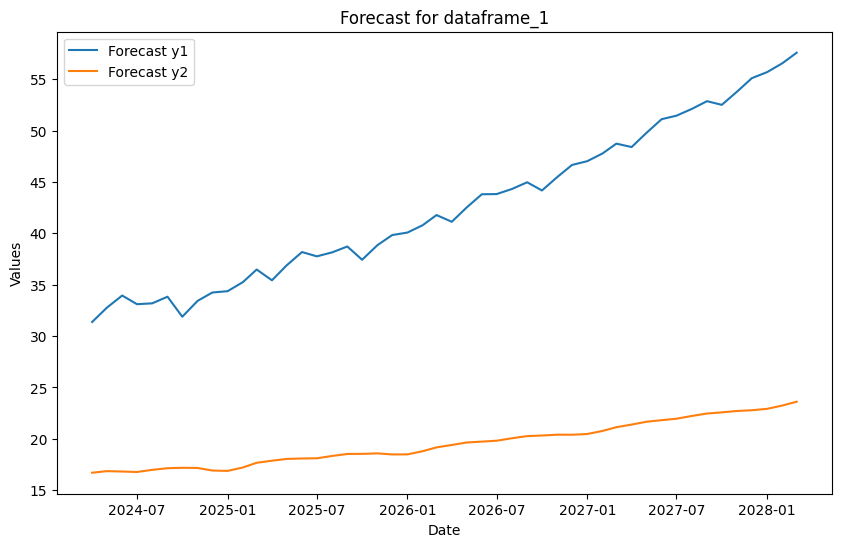

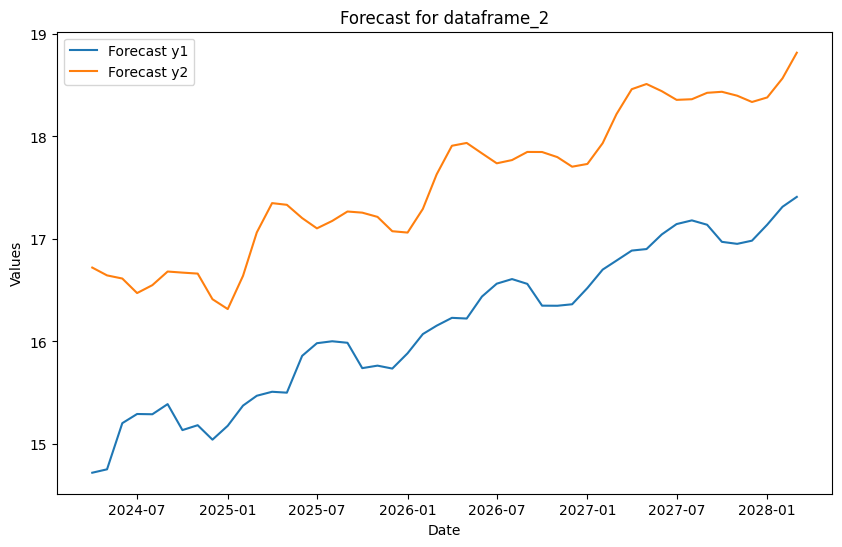

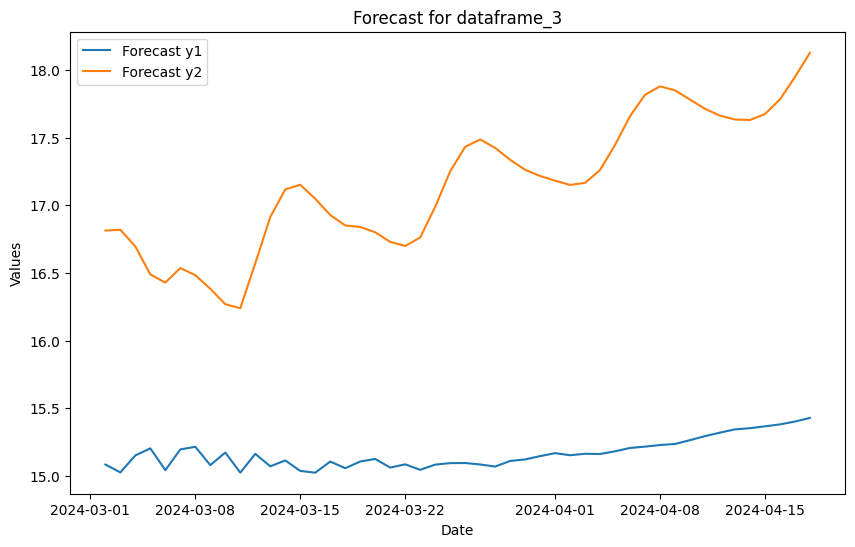

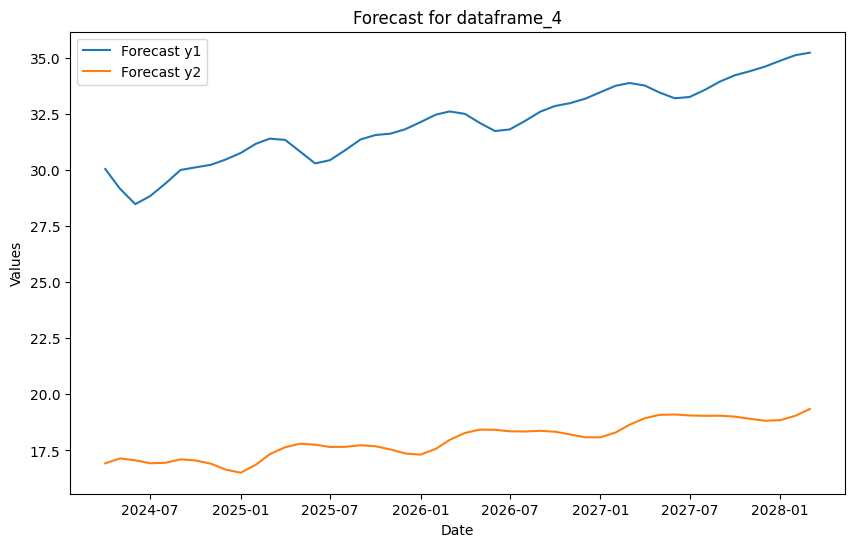

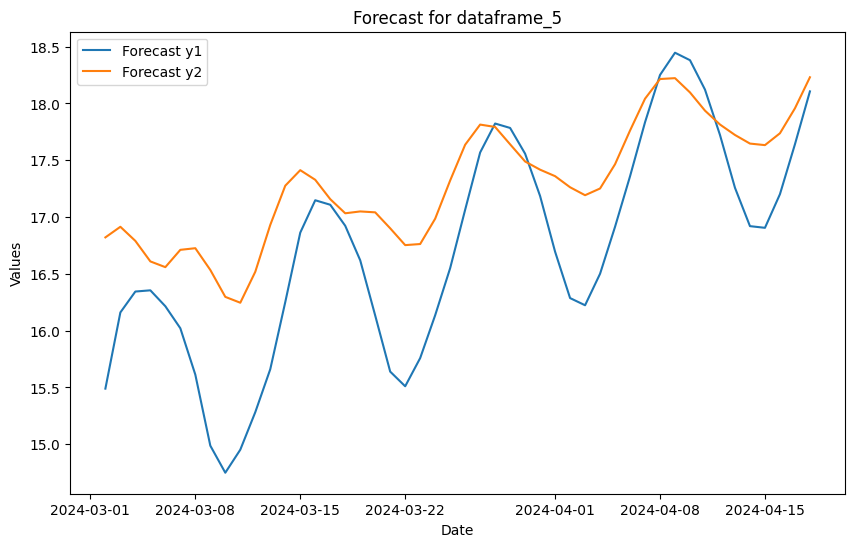

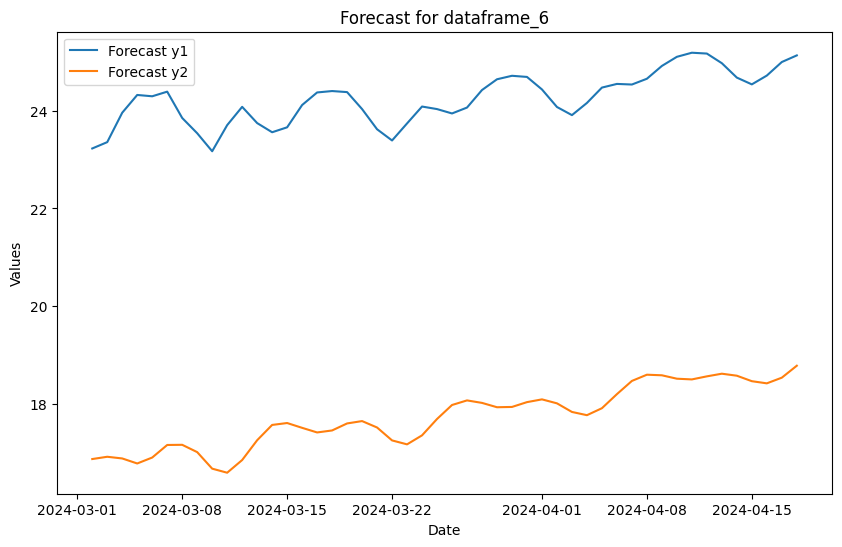

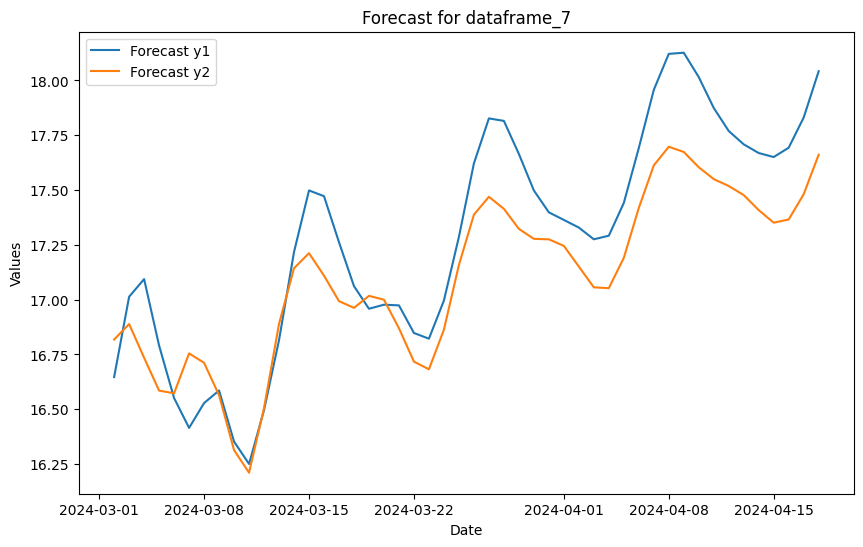

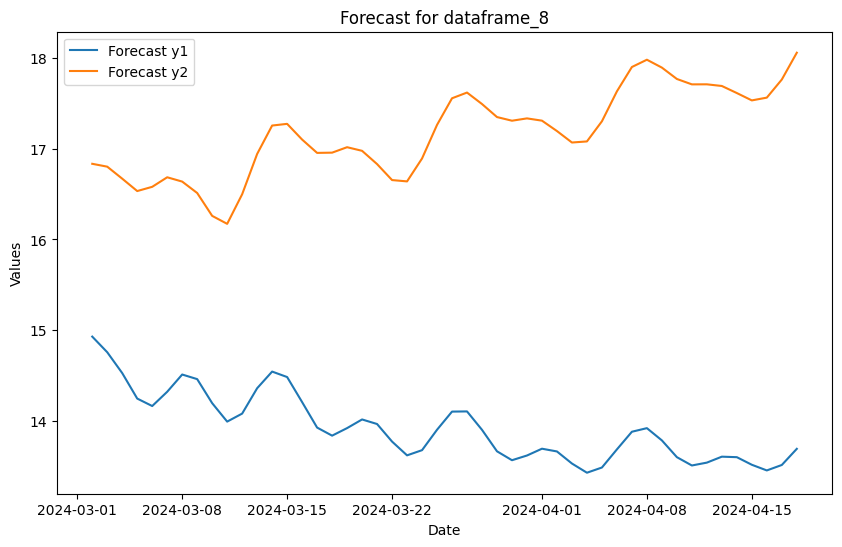

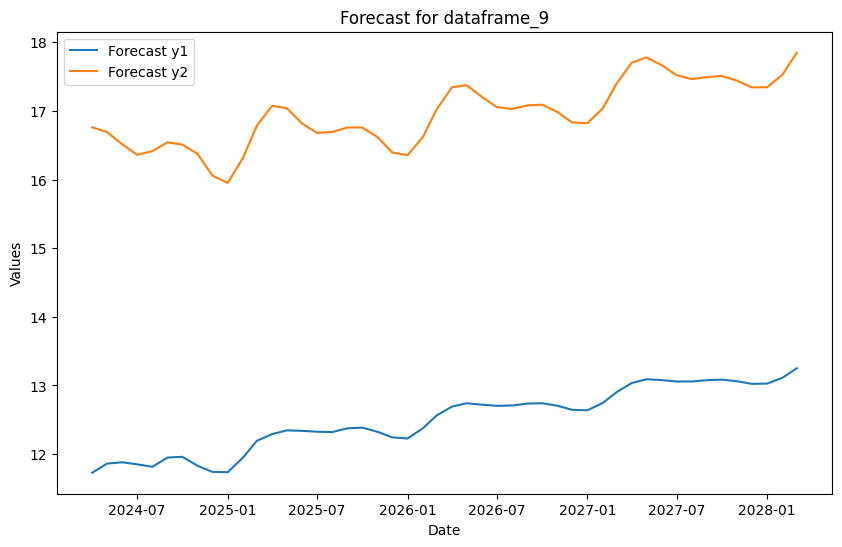

In [45]:
def plot_forecasts(dfs):
    """
    Plots the forecasted values for each dataframe.
    
    Parameters:
    dfs (dict): Dictionary containing forecast dataframes for each concatenated dataframe.
    """
    for key, forecast_df in dfs.items():
        plt.figure(figsize=(10, 6))
        plt.plot(forecast_df.index, forecast_df['y1'], label='Forecast y1')
        plt.plot(forecast_df.index, forecast_df['y2'], label='Forecast y2')
        plt.title(f'Forecast for {key}')
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.legend()
        plt.show()

plot_forecasts(dfs)


In [46]:
dataframes_electro = [stateid_CA, stateid_CO, stateid_FL, stateid_MA, stateid_MN, stateid_NY, stateid_OH, stateid_TX, stateid_WA]


forecast_stateid_CA = dfs["dataframe_1"]
forecast_stateid_CO = dfs["dataframe_2"]
forecast_stateid_FL = dfs["dataframe_3"]
forecast_stateid_MA = dfs["dataframe_4"]
forecast_stateid_MN = dfs["dataframe_5"]
forecast_stateid_NY = dfs["dataframe_6"]
forecast_stateid_OH = dfs["dataframe_7"]
forecast_stateid_TX = dfs["dataframe_8"]
forecast_stateid_WA = dfs["dataframe_9"]

mean_CA = forecast_stateid_CA.mean()
mean_CO = forecast_stateid_CO.mean()
mean_FL = forecast_stateid_FL.mean()
mean_MA = forecast_stateid_MA.mean()
mean_MN = forecast_stateid_MN.mean()
mean_NY = forecast_stateid_NY.mean()
mean_OH = forecast_stateid_OH.mean()
mean_TX = forecast_stateid_TX.mean()
mean_WA = forecast_stateid_WA.mean()

In [47]:
dataframes_petrol_Midgrade = [stateid_SCA_Midgrade_Gasoline, stateid_SCO_Midgrade_Gasoline, stateid_SFL_Midgrade_Gasoline, stateid_SMA_Midgrade_Gasoline, stateid_SMN_Midgrade_Gasoline, stateid_SNY_Midgrade_Gasoline, stateid_SOH_Midgrade_Gasoline, stateid_STX_Midgrade_Gasoline, stateid_SWA_Midgrade_Gasoline]
dataframes_petrol_Regular = [stateid_SCA_Regular_Gasoline, stateid_SCO_Regular_Gasoline, stateid_SFL_Regular_Gasoline, stateid_SMA_Regular_Gasoline, stateid_SMN_Regular_Gasoline, stateid_SNY_Regular_Gasoline, stateid_SOH_Regular_Gasoline, stateid_STX_Regular_Gasoline, stateid_SWA_Regular_Gasoline]
dataframes_petrol_Premium = [stateid_SMN_Premium_Gasoline, stateid_SCA_Premium_Gasoline, stateid_SCO_Premium_Gasoline, stateid_SFL_Premium_Gasoline, stateid_SMA_Premium_Gasoline, stateid_SNY_Premium_Gasoline, stateid_SOH_Premium_Gasoline, stateid_STX_Premium_Gasoline , stateid_SWA_Premium_Gasoline]

In [48]:
results, dfs = fit_var_model_per_dataframe(dataframes_petrol_Premium, stateid_US= stateid_NUS_Premium_Gasoline, forecast_steps=204)
for key, value in results.items():
    print(f"\nResults for {key}:")
    print("Errors:", value['errors'])
    print("Forecast:\n", value['forecast'])

Dataframe 1 has duplicate index values. Dropping duplicates.
Dataframe 2 has duplicate index values. Dropping duplicates.
Dataframe 3 has duplicate index values. Dropping duplicates.
Dataframe 4 has duplicate index values. Dropping duplicates.
Dataframe 5 has duplicate index values. Dropping duplicates.
Dataframe 6 has duplicate index values. Dropping duplicates.
Dataframe 7 has duplicate index values. Dropping duplicates.
Dataframe 8 has duplicate index values. Dropping duplicates.
Dataframe 9 has duplicate index values. Dropping duplicates.
Number of observations in concatenated Dataframe 1: 1254
Number of variables in concatenated Dataframe 1: 2
Initial maxlags for Dataframe 1: 15
Optimal number of lags for Dataframe 1: 5
Number of observations in concatenated Dataframe 2: 1256
Number of variables in concatenated Dataframe 2: 2
Initial maxlags for Dataframe 2: 15
Optimal number of lags for Dataframe 2: 6
Number of observations in concatenated Dataframe 3: 1254
Number of variables in

c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal number of lags for Dataframe 3: 4
Number of observations in concatenated Dataframe 4: 1099
Number of variables in concatenated Dataframe 4: 2
Initial maxlags for Dataframe 4: 15
Optimal number of lags for Dataframe 4: 4
Number of observations in concatenated Dataframe 5: 1098
Number of variables in concatenated Dataframe 5: 2
Initial maxlags for Dataframe 5: 15
Optimal number of lags for Dataframe 5: 4
Number of observations in concatenated Dataframe 6: 1254
Number of variables in concatenated Dataframe 6: 2
Initial maxlags for Dataframe 6: 15


c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal number of lags for Dataframe 6: 11
Number of observations in concatenated Dataframe 7: 1098
Number of variables in concatenated Dataframe 7: 2
Initial maxlags for Dataframe 7: 15
Optimal number of lags for Dataframe 7: 4
Number of observations in concatenated Dataframe 8: 1254
Number of variables in concatenated Dataframe 8: 2
Initial maxlags for Dataframe 8: 15
Optimal number of lags for Dataframe 8: 7
Number of observations in concatenated Dataframe 9: 1100
Number of variables in concatenated Dataframe 9: 2
Initial maxlags for Dataframe 9: 15


c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\torei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal number of lags for Dataframe 9: 4

Results for dataframe_1:
Errors: {'MSE': 0.00024734759997602793, 'MAE': 0.010726606005465524, 'R2': 0.9951024809218458, 'MSAE': 0.00024734759997602825}
Forecast:
                   y1        y2
                   y         y
2024-06-18  1.017125  1.135066
2024-06-19  1.018662  1.130166
2024-06-20  1.019882  1.127381
2024-06-21  1.020096  1.124963
2024-06-22  1.021337  1.123474
...              ...       ...
2025-01-03  0.842817  0.896589
2025-01-04  0.842439  0.896181
2025-01-05  0.842066  0.895778
2025-01-06  0.841696  0.895379
2025-01-07  0.841330  0.894984

[204 rows x 2 columns]

Results for dataframe_2:
Errors: {'MSE': 0.00019674668495560512, 'MAE': 0.008695670177811091, 'R2': 0.9970681561064212, 'MSAE': 0.00019674668495560507}
Forecast:
                   y1        y2
                   y         y
2024-06-18  1.322410  1.139470
2024-06-19  1.316689  1.134879
2024-06-20  1.313338  1.132572
2024-06-21  1.310471  1.130775
2024-06-22  1.307

In [49]:
#results = fit_var_model_per_dataframe(dataframes_petrol, stateid_US= )

In [50]:
mean_SMN_Premium = dfs["dataframe_1"].mean()
#mean_SCA_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.024835\n1    2024-06-10  1.024042\n2    2024-06-03  1.035403\n3    2024-05-27  1.086129\n4    2024-05-20  1.035403\n...         ...       ...\n1249 2000-07-03  0.461030\n1250 2000-06-26  0.495905\n1251 2000-06-19  0.519947\n1252 2000-06-12  0.502774\n1253 2000-06-05  0.452576\n\n[1254 rows x 2 columns]"].mean()
#mean_SCO_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.038838\n1    2024-06-10  1.048349\n2    2024-06-03  1.081374\n3    2024-05-27  1.101717\n4    2024-05-20  1.086129\n...         ...       ...\n1094 2003-06-23  0.439366\n1095 2003-06-16  0.441215\n1096 2003-06-09  0.433289\n1097 2003-06-02  0.432232\n1098 2003-05-26  0.432232\n\n[1099 rows x 2 columns]"].mean()
#mean_SFL_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.050462\n1    2024-06-10  1.017437\n2    2024-06-03  1.053104\n3    2024-05-27  1.039630\n4    2024-05-20  1.065258\n...         ...       ...\n1249 2000-07-03  0.496962\n1250 2000-06-26  0.499868\n1251 2000-06-19  0.491413\n1252 2000-06-12  0.470806\n1253 2000-06-05  0.458388\n\n[1254 rows x 2 columns]"].mean()
#mean_SMA_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.141876\n1    2024-06-10  1.147424\n2    2024-06-03  1.159313\n3    2024-05-27  1.164597\n4    2024-05-20  1.168296\n...         ...       ...\n1249 2000-07-03  0.495641\n1250 2000-06-26  0.489300\n1251 2000-06-19  0.485073\n1252 2000-06-12  0.472919\n1253 2000-06-05  0.463672\n\n[1254 rows x 2 columns]"].mean()
#mean_SNY_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.154822\n1    2024-06-10  1.157199\n2    2024-06-03  1.165654\n3    2024-05-27  1.167768\n4    2024-05-20  1.169089\n...         ...       ...\n1093 2003-06-23  0.444650\n1094 2003-06-16  0.446499\n1095 2003-06-09  0.442008\n1096 2003-06-02  0.445707\n1097 2003-05-26  0.447820\n\n[1098 rows x 2 columns]"].mean()
#mean_SOH_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.179128\n1    2024-06-10  1.116777\n2    2024-06-03  1.149273\n3    2024-05-27  1.177543\n4    2024-05-20  1.213474\n...         ...       ...\n1093 2003-06-23  0.419551\n1094 2003-06-16  0.452048\n1095 2003-06-09  0.443593\n1096 2003-06-02  0.412417\n1097 2003-05-26  0.426420\n\n[1098 rows x 2 columns]"].mean()
#mean_STX_Premium = dfs["dataframe_             ds         y\n0    2024-06-17  1.245178\n1    2024-06-10  1.266843\n2    2024-06-03  1.286658\n3    2024-05-27  1.317569\n4    2024-05-20  1.314135\n...         ...       ...\n1095 2003-06-23  0.475033\n1096 2003-06-16  0.473712\n1097 2003-06-09  0.463937\n1098 2003-06-02  0.462880\n1099 2003-05-26  0.463672\n\n[1100 rows x 2 columns]"].mean()
mean_SWA_Premium = dfs["dataframe_9"].mean()

In [51]:
mean_SWA_Premium

y1  y    1.035516
y2  y    0.971785
dtype: float64

In [52]:
mean_WA

y1  y    12.504916
y2  y    16.958682
dtype: float64

In [ ]:
def plot_correlation_heatmaps(dataframes):
    for stateid, df in dataframes.items():
        # Calculate the correlation matrix
        corr_matrix = df.corr()
        
        # Plot the heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
        plt.title(f'Correlation Matrix for stateid {stateid}')
        plt.show()

In [ ]:
#plot_correlation_heatmaps(stateid_dfs)

In [ ]:

def prophet_forecast(dataframes_petrol, forecast_period=600, test_size=0.2):
    """
    Perform Prophet forecasting, plot using Plotly, and evaluate using error metrics for a list of DataFrames.

    Parameters:
    - data_list (list of DataFrame): List of DataFrames, each containing columns 'ds' (datetime) and 'y' (numeric).
    - forecast_period (int): Number of periods to forecast into the future.
    - test_size (float): Proportion of data to use as test set.

    Returns:
    - forecasts (list of DataFrame): List of forecasted values with columns 'ds', 'yhat', 'yhat_lower', 'yhat_upper'.
    """
    forecasts = []
    
    for data in dataframes_petrol:
        # Train-test split
        train_size = int(0.8*len(data))
        X_train = data.iloc[:train_size]
        X_test = data.iloc[train_size:]
        
        # Initialize Prophet model
        m = Prophet()
        
        # Fit model on training data
        m.fit(X_train)
        
        # Create future dataframe for forecasting
        future = m.make_future_dataframe(periods=forecast_period)
        
        # Forecast
        forecast = m.predict(future)
        forecasts.append(forecast)
        
        # Plot forecast using Plotly
        fig = plot_plotly(m, forecast)
        fig.show()
        
        # Plot components using Plotly
        fig_components = plot_components_plotly(m, forecast)
        fig_components.show()
        
        # Evaluate forecast using error metrics
        y_true = X_test['y']
        y_pred = forecast.iloc[-len(X_test):]['yhat']
        
        # Calculate error metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        r2 = r2_score(y_true, y_pred)
        
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"R-squared (R2) Score: {r2}")
    
    return forecasts


forecasts = prophet_forecast(dataframes_petrol)

In [54]:
def calculate_break_even(
    gas_car_selling_price, gas_km_per_year, gas_price_per_liter, gas_liters_per_100km,
    electric_car_price, electric_price_per_kwh, electric_kwh_per_100km
):
    # Calculate the cost per kilometer for both cars
    gas_cost_per_km = (gas_price_per_liter * gas_liters_per_100km) / 100
    electric_cost_per_km = (electric_price_per_kwh * electric_kwh_per_100km) / 100

    # Calculate the net initial investment required to switch to the electric car
    net_initial_investment = electric_car_price - gas_car_selling_price

    # Calculate the break-even point in kilometers driven
    if gas_cost_per_km <= electric_cost_per_km:
        # If the gas car is cheaper to operate per km than the electric car,
        # a breakeven point will never be reached.
        return float('inf'), float('inf')

    break_even_km = net_initial_investment / (gas_cost_per_km - electric_cost_per_km)

    # Calculate the break-even point in years
    break_even_years = break_even_km / gas_km_per_year

    return break_even_km, break_even_years

def main():
    print("Enter the following information:")

    gas_car_selling_price = float(input("Selling price of the gas car (in dollars): "))
    gas_km_per_year = float(input("Kilometers driven per year with the gas car: "))
    gas_price_per_liter = float(input("Price of gas per liter (in dollars): "))
    gas_liters_per_100km = float(input("Liters of gas per 100 kilometers: "))

    electric_car_price = float(input("Price of the electric car (in dollars): "))
    electric_price_per_kwh = float(input("Price of electricity per kWh (in dollars): "))
    electric_kwh_per_100km = float(input("kWh per 100 kilometers for the electric car: "))

    break_even_km, break_even_years = calculate_break_even(
        gas_car_selling_price, gas_km_per_year, gas_price_per_liter, gas_liters_per_100km,
        electric_car_price, electric_price_per_kwh, electric_kwh_per_100km
    )

    if break_even_km == float('inf'):
        print("The electric car is not cheaper to operate than the gas car. No breakeven point will be reached.")
    else:
        print(f"Break-even distance: {break_even_km:.2f} km")
        print(f"Break-even time: {break_even_years:.2f} years")

In [56]:
main()

Enter the following information:
Break-even distance: 200803.21 km
Break-even time: 13.39 years


In [ ]:
'''pandas interpolate for nans

## dont use arima or sarima!!

prophet as first baseline model
-> xgBoost   class timeseries legs

plot with both prices -> correlations
try to understand the trends -> moving averadge / seasonality



In [ ]:
#wieghted mean
#explain VAR modell
#explain preprocss
stateid_CA

In [57]:
stateid_SCA_Premium_Gasoline

,ds,y
9,2024-06-17,1.332893
34,2024-06-10,1.353765
57,2024-06-03,1.386790
90,2024-05-27,1.413474
125,2024-05-20,1.428798
...,...,...
33246,2000-06-19,0.481902
33248,2000-06-12,0.482166
33273,2000-06-05,0.481902
33282,2000-05-29,0.484280
